In [1]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import dataPreprocessing as dp


import numpy as np

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

# Tested with model with smaller anomaly (M5b)

In [11]:
model = 'M5b'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)[:,:-2]

2019-08-30 03:30:34,683 | INFO : sil=0.392596, chs=4920.261814
2019-08-30 03:30:35,460 | INFO : sil=0.418459, chs=5036.778691
2019-08-30 03:30:36,230 | INFO : sil=0.460472, chs=5576.506329
2019-08-30 03:30:36,973 | INFO : sil=0.461307, chs=6011.893036
2019-08-30 03:30:37,744 | INFO : sil=0.460473, chs=6466.897791
2019-08-30 03:30:38,367 | INFO : sil=0.452971, chs=6454.546965
2019-08-30 03:30:39,002 | INFO : sil=0.449584, chs=6561.527597
2019-08-30 03:30:39,652 | INFO : sil=0.457224, chs=6816.550373
2019-08-30 03:30:40,323 | INFO : sil=0.457719, chs=7017.544863
2019-08-30 03:30:41,001 | INFO : sil=0.456844, chs=7275.660793
2019-08-30 03:30:41,709 | INFO : sil=0.448690, chs=7388.280423
2019-08-30 03:30:42,449 | INFO : sil=0.451609, chs=7397.220008
2019-08-30 03:30:43,155 | INFO : sil=0.447468, chs=7464.594661
2019-08-30 03:30:43,868 | INFO : sil=0.448456, chs=7537.628682
2019-08-30 03:30:44,644 | INFO : sil=0.438811, chs=7594.820001


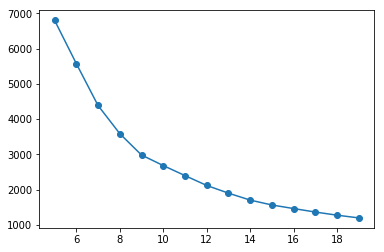

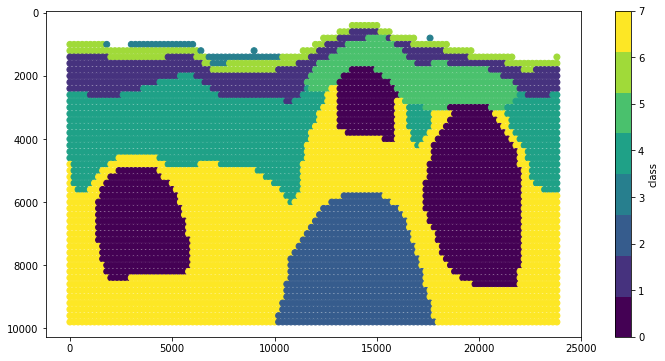

sil= 0.4613065468089771 ch= 6011.893035648384 ent= 0.5022640650722597 pur= 0.7684368549446425 sse= 3588.9957021872706


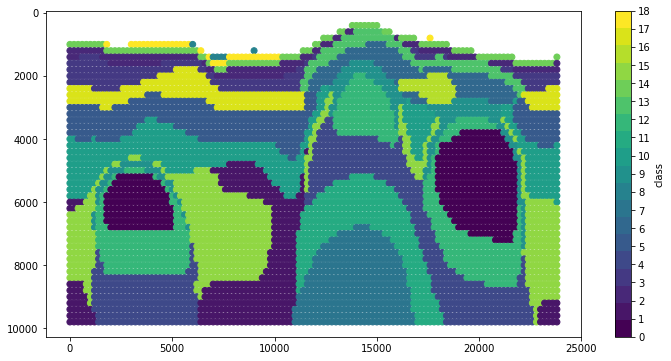

sil= 0.43881079070514567 ch= 7594.820000755716 ent= 0.21250095482509068 pur= 0.9397635578907861 sse= 1195.5063612473452


In [41]:
in_range = range(5,20)
cluster_labels, avg_sils, ch_scs, SSE, best_idx = mh.iter_kmean(norm_data, in_range)

for i in best_idx:
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)
    ent, pur = mh.ext_eval_entropy(label, cluster_labels[i])
    print("sil=",avg_sils[i],"ch=", ch_scs[i], "ent=", ent,"pur=", pur, "sse=", SSE[i])
    

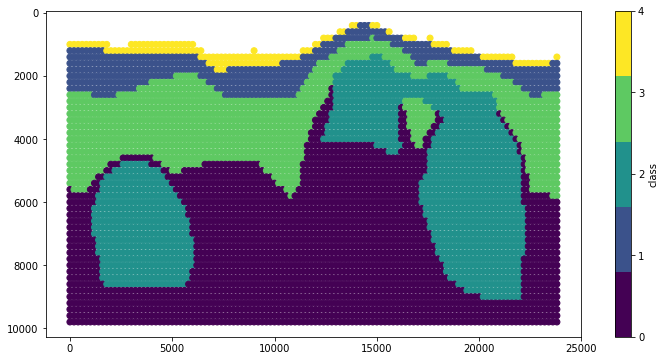

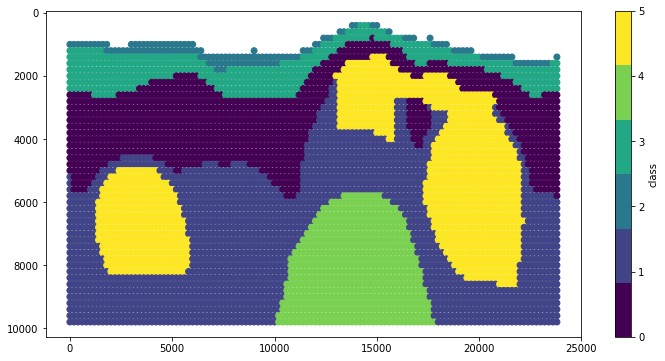

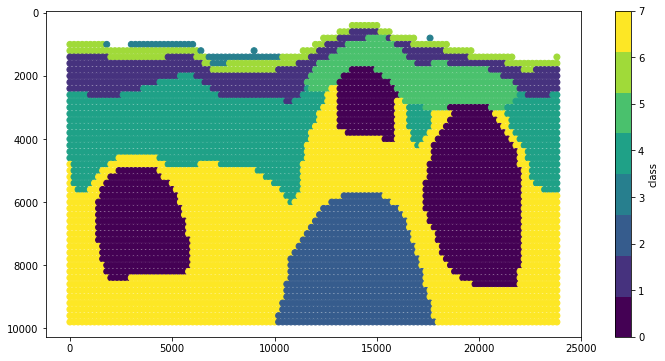

In [47]:
# test plottin for n_cluster = 5, 6, 8
mh.plot_e_model(cluster_labels[0], x, z, sep_label=True)
mh.plot_e_model(cluster_labels[1], x, z, sep_label=True)
mh.plot_e_model(cluster_labels[3], x, z, sep_label=True)


# Tested with model with higher anomaly (M5a)

In [3]:
model = 'M5a'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)

means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

2019-08-30 03:31:21,834 | INFO : sil=0.328924, chs=2537.134367
2019-08-30 03:31:22,567 | INFO : sil=0.342569, chs=2641.908178
2019-08-30 03:31:23,376 | INFO : sil=0.353615, chs=2601.067726
2019-08-30 03:31:24,187 | INFO : sil=0.348006, chs=2536.044967
2019-08-30 03:31:24,938 | INFO : sil=0.357756, chs=2647.446248
2019-08-30 03:31:25,756 | INFO : sil=0.372406, chs=2728.293103
2019-08-30 03:31:26,529 | INFO : sil=0.364982, chs=2837.143786
2019-08-30 03:31:27,333 | INFO : sil=0.384045, chs=2984.240814
2019-08-30 03:31:28,170 | INFO : sil=0.388796, chs=3003.369898
2019-08-30 03:31:29,044 | INFO : sil=0.373964, chs=3021.170254
2019-08-30 03:31:29,842 | INFO : sil=0.378134, chs=3024.009290
2019-08-30 03:31:30,672 | INFO : sil=0.379418, chs=3009.386258
2019-08-30 03:31:31,445 | INFO : sil=0.372971, chs=3031.825483
2019-08-30 03:31:32,286 | INFO : sil=0.374911, chs=3030.733001
2019-08-30 03:31:33,276 | INFO : sil=0.369156, chs=3010.808350
sil= 0.3887957817533873 ch= 3003.36989848816 ent= 0.463

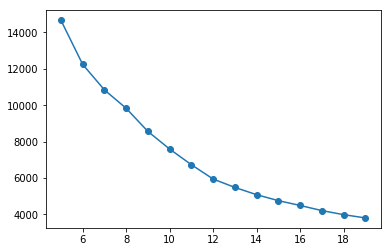

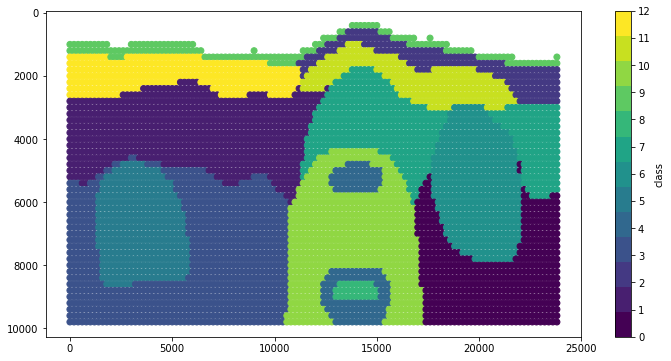

sil= 0.37297085045386913 ch= 3031.825482513214 ent= 0.3149920525126436 pur= 0.8838431225370613 sse= 4207.660327928492


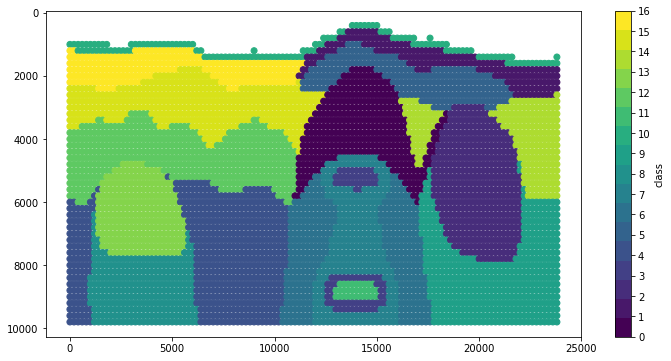

In [44]:
in_range = range(5,20)
cluster_labels_2, avg_sils_2, ch_scs_2, SSE_2, best_idx_2 = mh.iter_kmean(norm_data, in_range)

for i in best_idx_2:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_2[i])
    print("sil=",avg_sils_2[i],"ch=", ch_scs_2[i], "ent=", ent,"pur=", pur, "sse=", SSE_2[i])
    mh.plot_e_model(cluster_labels_2[i], x, z, sep_label=True)
    

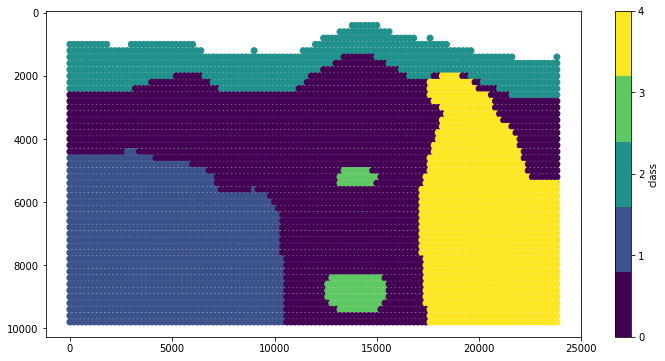

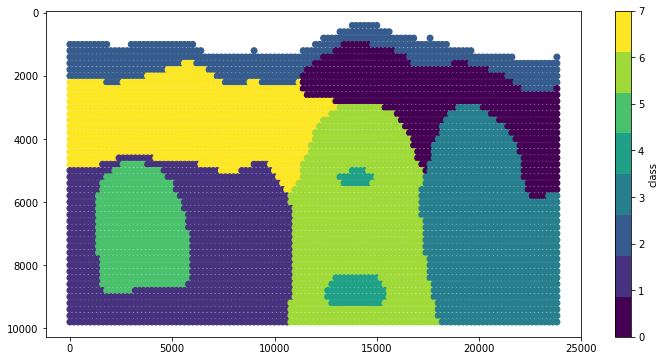

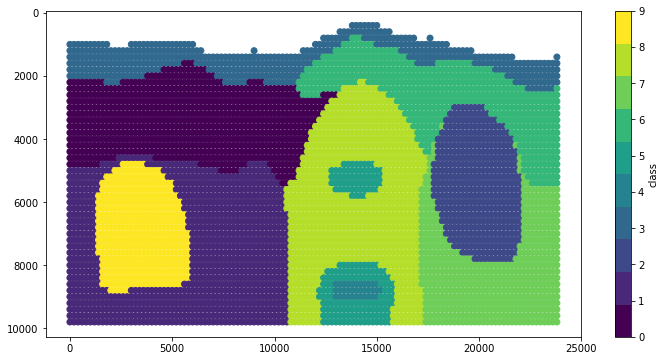

In [45]:
# test plottin for n_cluster = 5, 8, 10
mh.plot_e_model(cluster_labels_2[0], x, z, sep_label=True)
mh.plot_e_model(cluster_labels_2[3], x, z, sep_label=True)
mh.plot_e_model(cluster_labels_2[5], x, z, sep_label=True)


# test with various input parameters
Tested to see if K-mean could perform better if there are less number of parameter presented. This is tested with model M5b.

In [12]:
col_name = ['vp', 'vs', 'dn', 'vp/vs', 'qp', 'qs', 'x', 'z']

vp_idx = mh.search_list(col_name, 'vp')
vs_idx = mh.search_list(col_name, 'vs')
dn_idx = mh.search_list(col_name, 'dn')
vpvs_idx = mh.search_list(col_name, 'vp/vs')
qp_idx = mh.search_list(col_name, 'qp')

# when the only available data are: Vp, Vs, Vp/Vs
test_data_1 = np.squeeze(norm_data[:, [vp_idx, vs_idx, vpvs_idx]])

# when the only available data are: Vp, Qp, Density
test_data_2 = np.squeeze(norm_data[:, [vp_idx, qp_idx, dn_idx]])

# when the only available data are: Vp, Vs
test_data_3 = np.squeeze(norm_data[:, [vp_idx, vs_idx]])

### Without Topographic location

2019-08-30 06:35:39,520 | INFO : sil=0.574082, chs=10793.832842
2019-08-30 06:35:40,207 | INFO : sil=0.517554, chs=11675.606213
2019-08-30 06:35:40,877 | INFO : sil=0.520941, chs=12463.409080
2019-08-30 06:35:41,598 | INFO : sil=0.555612, chs=13406.934833
2019-08-30 06:35:42,286 | INFO : sil=0.556027, chs=14544.424108
2019-08-30 06:35:43,117 | INFO : sil=0.552449, chs=15814.036389
2019-08-30 06:35:43,873 | INFO : sil=0.536495, chs=16031.499818
2019-08-30 06:35:44,583 | INFO : sil=0.522283, chs=16121.661436
2019-08-30 06:35:45,272 | INFO : sil=0.520114, chs=16389.719986
2019-08-30 06:35:46,074 | INFO : sil=0.513196, chs=16607.578642
2019-08-30 06:35:46,796 | INFO : sil=0.483291, chs=16943.608714
2019-08-30 06:35:47,639 | INFO : sil=0.473886, chs=17137.800481
2019-08-30 06:35:48,433 | INFO : sil=0.475132, chs=17107.263816
2019-08-30 06:35:49,316 | INFO : sil=0.477903, chs=17478.325838
2019-08-30 06:35:50,236 | INFO : sil=0.463064, chs=17359.482316
sil= 0.5740816833712601 ch= 10793.832842

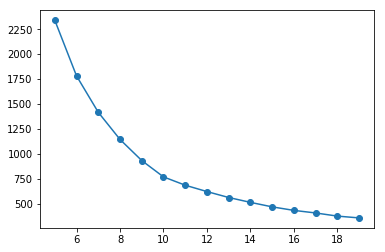

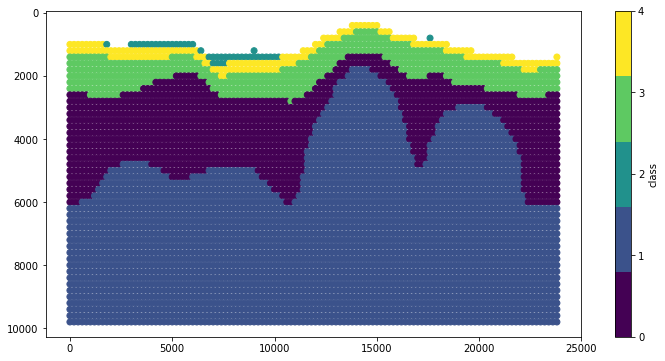

sil= 0.47790330443680545 ch= 17478.325837942146 ent= 0.28668064816460004 pur= 0.9084255957965849 sse= 374.31664303111194


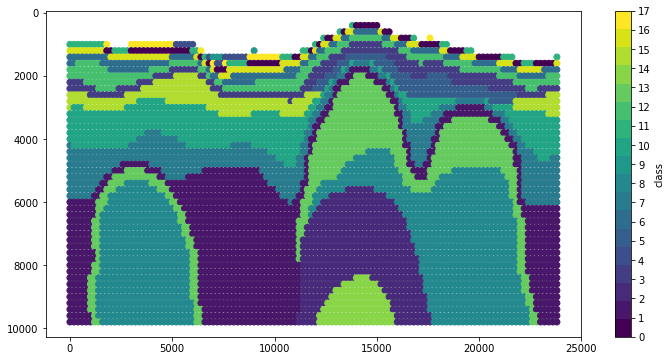

In [20]:
in_range = range(5,20)
cluster_labels_t0, avg_sils_t0, ch_scs_t0, SSE_t0, best_idx_t0 = mh.iter_kmean(norm_data[:,:-2], in_range)

for i in best_idx_t0:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t0[i])
    print("sil=",avg_sils_t0[i],"ch=", ch_scs_t0[i], "ent=", ent,"pur=", pur, "sse=", SSE_t0[i])
    mh.plot_e_model(cluster_labels_t0[i], x, z, sep_label=True)
    

### Vp, Vs, Vp/Vs

2019-08-30 06:33:06,066 | INFO : sil=0.603397, chs=10810.391942
2019-08-30 06:33:06,872 | INFO : sil=0.476940, chs=10655.975953
2019-08-30 06:33:07,666 | INFO : sil=0.525599, chs=11241.468384
2019-08-30 06:33:08,388 | INFO : sil=0.539660, chs=12531.209612
2019-08-30 06:33:09,238 | INFO : sil=0.541199, chs=14463.470983
2019-08-30 06:33:09,980 | INFO : sil=0.539989, chs=16064.103722
2019-08-30 06:33:10,732 | INFO : sil=0.529913, chs=16422.475647
2019-08-30 06:33:11,592 | INFO : sil=0.528754, chs=17171.165574
2019-08-30 06:33:12,373 | INFO : sil=0.527074, chs=17916.523485
2019-08-30 06:33:13,138 | INFO : sil=0.522884, chs=18609.012290
2019-08-30 06:33:13,937 | INFO : sil=0.479858, chs=18937.332584
2019-08-30 06:33:14,714 | INFO : sil=0.473486, chs=19523.523999
2019-08-30 06:33:15,461 | INFO : sil=0.471510, chs=20224.719851
2019-08-30 06:33:16,386 | INFO : sil=0.456875, chs=20591.567054
2019-08-30 06:33:17,410 | INFO : sil=0.471060, chs=20786.121225
sil= 0.6033966808387103 ch= 10810.391941

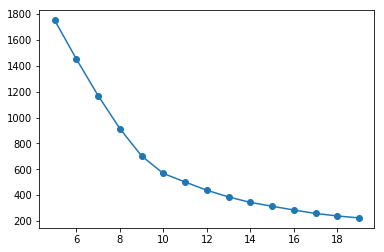

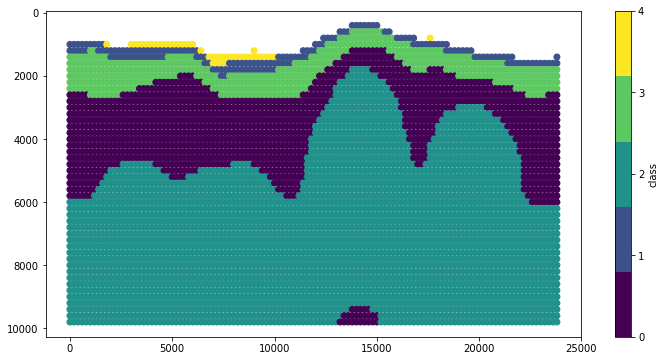

sil= 0.4710596725625958 ch= 20786.121225235478 ent= 0.3634345188515954 pur= 0.8545693375867892 sse= 223.7248658770605


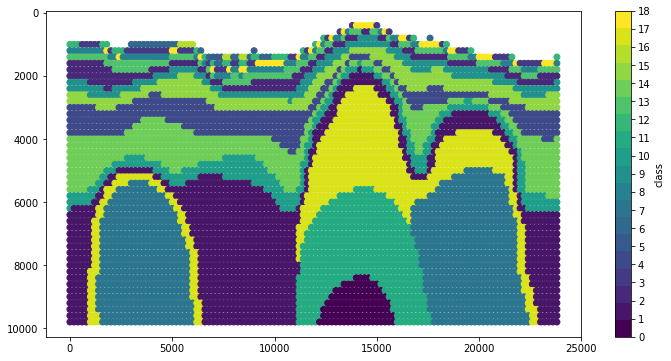

In [13]:
in_range = range(5,20)
cluster_labels_t1, avg_sils_t1, ch_scs_t1, SSE_t1, best_idx_t1 = mh.iter_kmean(test_data_1, in_range)

for i in best_idx_t1:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t1[i])
    print("sil=",avg_sils_t1[i],"ch=", ch_scs_t1[i], "ent=", ent,"pur=", pur, "sse=", SSE_t1[i])
    mh.plot_e_model(cluster_labels_t1[i], x, z, sep_label=True)
    

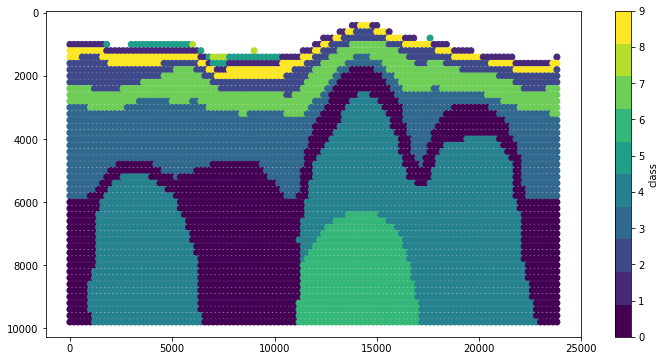

In [14]:
# plot elbow point index = 10
mh.plot_e_model(cluster_labels_t1[5], x, z, sep_label=True)


### Vp, Qp, Density

2019-08-30 06:33:19,459 | INFO : sil=0.417024, chs=6273.721963
2019-08-30 06:33:20,240 | INFO : sil=0.455060, chs=6898.152061
2019-08-30 06:33:21,150 | INFO : sil=0.452877, chs=7410.766456
2019-08-30 06:33:21,917 | INFO : sil=0.473113, chs=8246.752903
2019-08-30 06:33:22,594 | INFO : sil=0.471060, chs=8382.819375
2019-08-30 06:33:23,275 | INFO : sil=0.477619, chs=8618.607285
2019-08-30 06:33:23,955 | INFO : sil=0.469426, chs=9030.239629
2019-08-30 06:33:24,658 | INFO : sil=0.465523, chs=9117.001102
2019-08-30 06:33:25,371 | INFO : sil=0.454342, chs=9290.502531
2019-08-30 06:33:26,070 | INFO : sil=0.435577, chs=9264.276883
2019-08-30 06:33:26,780 | INFO : sil=0.431915, chs=9311.563157
2019-08-30 06:33:27,577 | INFO : sil=0.438712, chs=9560.916645
2019-08-30 06:33:28,378 | INFO : sil=0.429767, chs=9573.930100
2019-08-30 06:33:29,230 | INFO : sil=0.429717, chs=9528.366503
2019-08-30 06:33:30,019 | INFO : sil=0.431693, chs=9753.300497
sil= 0.4776185552579375 ch= 8618.607285462484 ent= 0.29

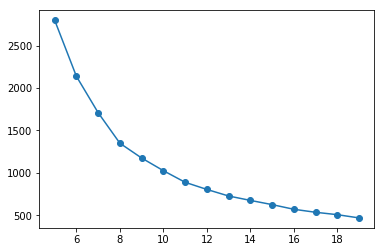

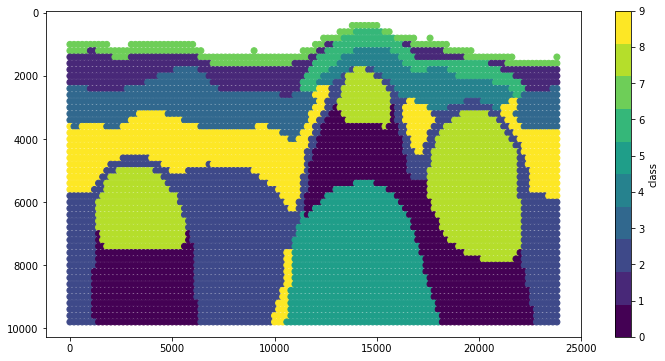

sil= 0.43169312852339725 ch= 9753.300496657306 ent= 0.23256160500230336 pur= 0.9238130981422406 sse= 469.3517429747429


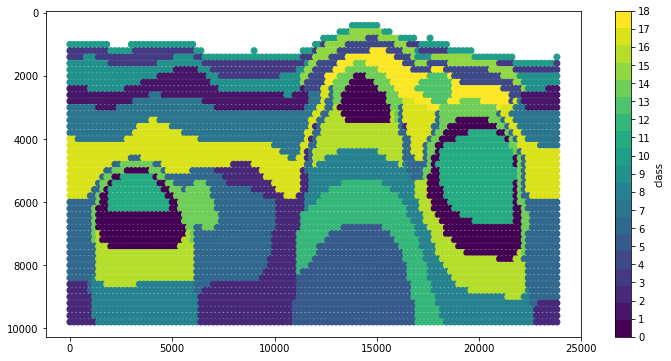

In [15]:
in_range = range(5,20)
cluster_labels_t2, avg_sils_t2, ch_scs_t2, SSE_t2, best_idx_t2 = mh.iter_kmean(test_data_2, in_range)

for i in best_idx_t2:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t2[i])
    print("sil=",avg_sils_t2[i],"ch=", ch_scs_t2[i], "ent=", ent,"pur=", pur, "sse=", SSE_t2[i])
    mh.plot_e_model(cluster_labels_t2[i], x, z, sep_label=True)
    

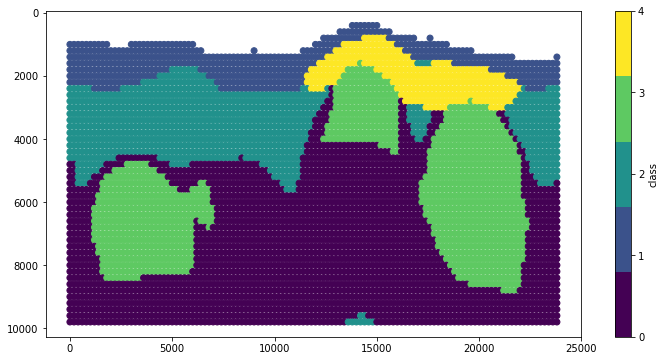

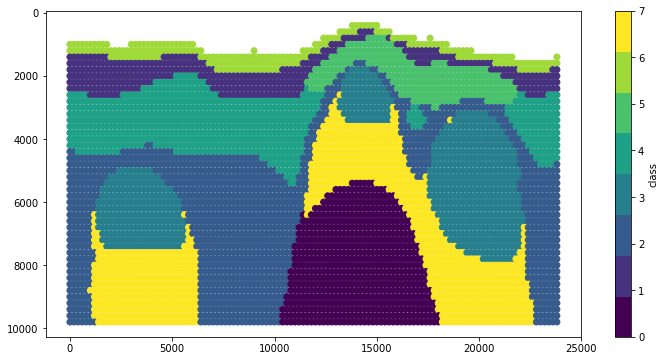

In [16]:
# test plotting for n_cluster = 5 and 8
mh.plot_e_model(cluster_labels_t2[0], x, z, sep_label=True)
mh.plot_e_model(cluster_labels_t2[3], x, z, sep_label=True)


### Vp, Vs

2019-08-30 06:33:32,502 | INFO : sil=0.534426, chs=25131.150290
2019-08-30 06:33:33,225 | INFO : sil=0.537228, chs=29865.812401
2019-08-30 06:33:33,959 | INFO : sil=0.528794, chs=31536.132509
2019-08-30 06:33:34,739 | INFO : sil=0.520558, chs=32743.639353
2019-08-30 06:33:35,476 | INFO : sil=0.494047, chs=33935.448356
2019-08-30 06:33:36,170 | INFO : sil=0.491297, chs=35511.197264
2019-08-30 06:33:36,893 | INFO : sil=0.508616, chs=37020.742105
2019-08-30 06:33:37,659 | INFO : sil=0.531914, chs=39166.843367
2019-08-30 06:33:38,405 | INFO : sil=0.530441, chs=41288.602569
2019-08-30 06:33:39,179 | INFO : sil=0.546596, chs=44873.339647
2019-08-30 06:33:39,944 | INFO : sil=0.546550, chs=46819.916239
2019-08-30 06:33:40,671 | INFO : sil=0.541285, chs=49686.418453
2019-08-30 06:33:41,525 | INFO : sil=0.541519, chs=52017.591507
2019-08-30 06:33:42,309 | INFO : sil=0.541202, chs=53198.855956
2019-08-30 06:33:43,093 | INFO : sil=0.542931, chs=55007.789558
sil= 0.546596378213416 ch= 44873.3396466

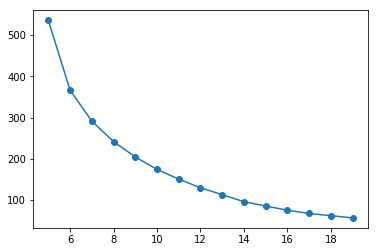

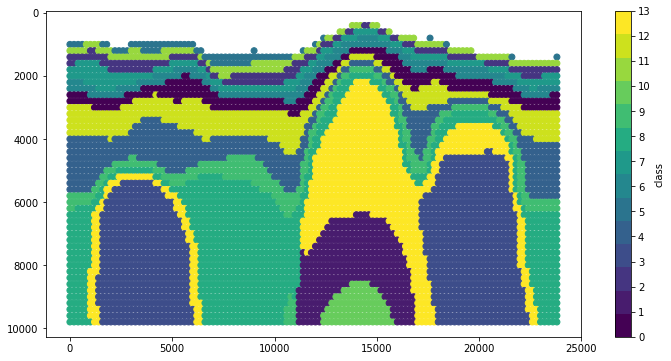

sil= 0.5429310479615984 ch= 55007.789558489014 ent= 0.35738884886712047 pur= 0.8598236066804279 sse= 56.852983187276855


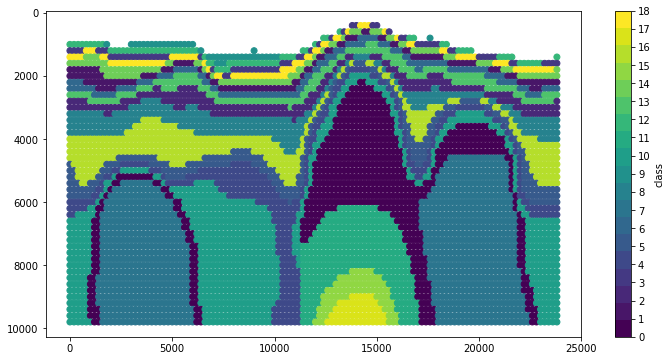

In [17]:
in_range = range(5,20)
cluster_labels_t3, avg_sils_t3, ch_scs_t3, SSE_t3, best_idx_t3 = mh.iter_kmean(test_data_3, in_range)

for i in best_idx_t3:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels_t3[i])
    print("sil=",avg_sils_t3[i],"ch=", ch_scs_t3[i], "ent=", ent,"pur=", pur, "sse=", SSE_t3[i])
    mh.plot_e_model(cluster_labels_t3[i], x, z, sep_label=True)
    

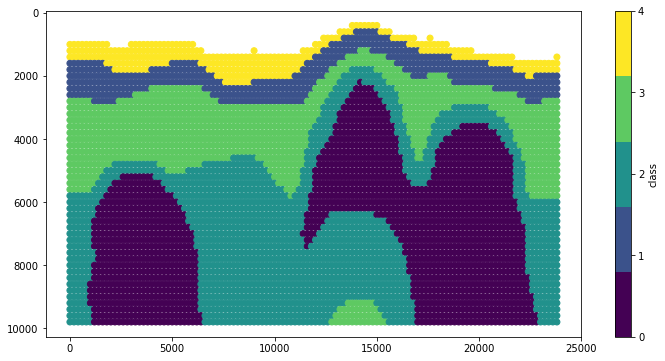

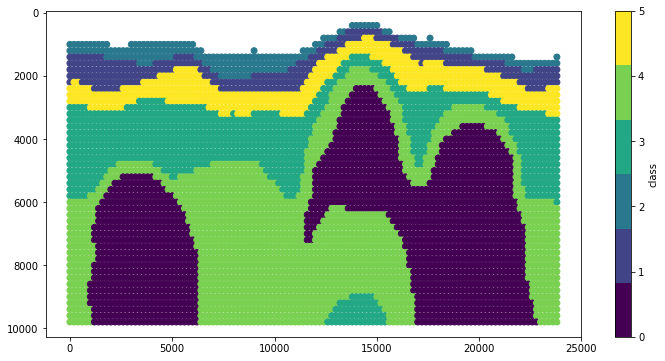

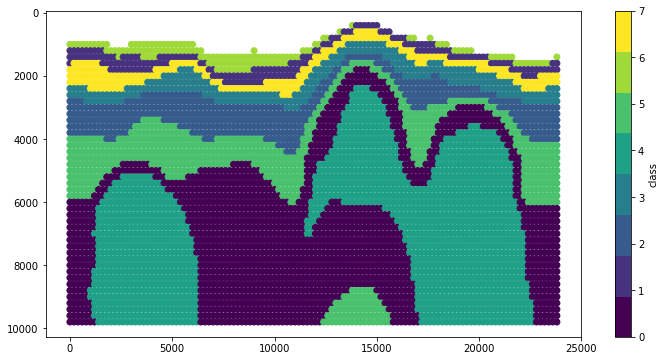

In [18]:
# test plotting for n_cluster = 5, 6 (elbow), 8
mh.plot_e_model(cluster_labels_t3[0], x, z, sep_label=True)
mh.plot_e_model(cluster_labels_t3[1], x, z, sep_label=True)
mh.plot_e_model(cluster_labels_t3[3], x, z, sep_label=True)
